<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_6_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83(K_Nearest_Neighbor)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing

plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


1. StandardScaler
* 평균=0, 표준편차=1로 조정해서 모든 특성이 같은 크기를 갖게 한다.

2. MinMaxScaler
* 최대값=1, 최소값=0으로 조정, 아웃라이어에 취약

3. RobustScaler
* 중앙값=0, IQR(1분위~3분위값)=1로 조정, 아웃라이어 영향을 최소화하며 정규분포보다 더 넓게 분포

 

4. MaxAbsScaler

* 0을 기준으로 절대값이 가장 큰 수가 1 또는 -1이 되도록 조정, 양수 데이터로만 구성된 데이터셋에서는 아웃라이어에 민감


데이터 스케일링을 하는 이유가 아웃라이어의 영향을 최소화하는 것이기 때문에 보통은 이상치 영향을 가장 적게 받는 StandardScaler 혹은 RobustScaler를 주로 사용한다. 모두 사이킷런에서 모듈을 제공한다.

In [ ]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#print(X[0:5])

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#print(X_train_scale[0:5])
#print(X_test_scale[0:5])

model = KNeighborsClassifier()
model.fit(X_train, y_train)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[-0.06195386 -0.744744    0.05761671 -0.02009354]
 [ 1.67275415  0.37798565  1.26756771  0.7836481 ]
 [-0.80540015  1.05162343 -1.32518442 -1.35966295]
 [-0.92930786  1.50071529 -1.32518442 -1.09174906]
 [-0.80540015  0.82707751 -1.38280114 -1.35966295]]
[[ 0.433677    0.82707751  0.92186742  1.4534328 ]
 [ 1.05321558  0.60253158  1.09471757  1.18551892]
 [ 1.05321558  0.15343972  0.34570028  0.24782034]
 [-0.18586157 -1.19383586  0.69140057  1.05156198]
 [-0.433677   -1.41838179 -0.05761671 -0.28800742]]


KNeighborsClassifier()

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9583333333333334
1.0


In [ ]:
model_scaler = KNeighborsClassifier()
model_scaler.fit(X_train_scale, y_train)

print(model_scaler.score(X_train_scale, y_train))
print(model_scaler.score(X_test_scale, y_test))

0.95
1.0


In [ ]:
cross_validate(estimator = KNeighborsClassifier(), X=X, y=y, cv=5,  verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00134492, 0.00071597, 0.00090456, 0.00165963, 0.00065374]),
 'score_time': array([0.00212669, 0.00386643, 0.00426841, 0.0032053 , 0.00182748]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors': [3,5,7], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree','kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, n_jobs=multiprocessing.cpu_count(), verbose=True)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
0.9800000000000001


In [ ]:
def make_meshgrid(X, y, h=.02):
  X_min, X_max = X.min()-1, X.max()+1
  y_min, y_max = y.min()-1, y.max()+1

  XX, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(y_min, y_max, h))

  return XX, yy

def plot_contours(clf, XX, yy, **params):
  Z = clf.predict(np.c_[XX.ravel(), yy.ravel()])
  Z = Z.reshape(XX.shape)
  out = plt.contourf(XX, yy, Z, **params)

  return out

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,0,1,Target
0,16.759108,-12.585492,0
1,19.135893,-11.600334,0
2,19.245869,-12.554137,0
3,19.612907,-12.205692,0
4,16.674147,-12.314794,0
...,...,...,...
145,-4.435969,10.039481,2
146,-7.565058,9.383181,2
147,-5.331126,9.748136,2
148,-5.072736,11.772384,2


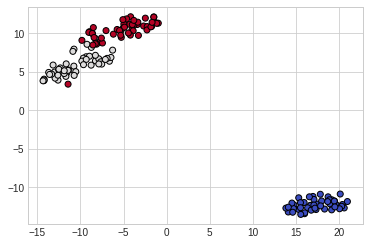

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

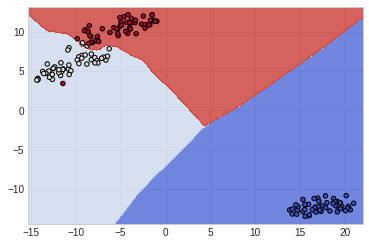

In [ ]:
XX, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, XX, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
 

### 유방암 데이터

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

### 캘리포니아 주택 가격 데이터